In [ ]:
#Step -1
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set to display all the columns of the dataset
pd.set_option("display.max_columns",None)

#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

/home/l2-48/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Data Class Proportions:
Normal: 621 OSCC: 2032


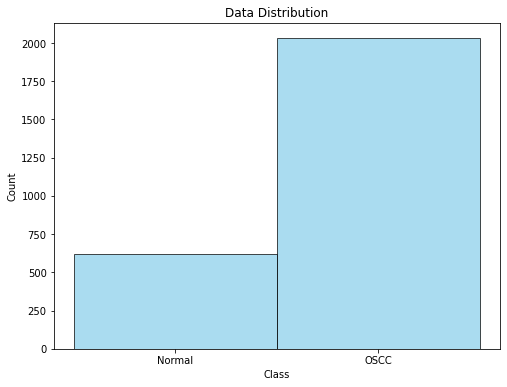

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define constants
data_path = r"/home/l2-48/Downloads/ARVIND/oral-combined-dataset"  # Updated path
target_size = (224, 224)  # Define the target size for resizing

# Function to load and preprocess images from a given folder
def load_images_from_folder(folder_path, label):
    images = []
    labels = []
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        # Read the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Resize the image to the target size
        img = cv2.resize(img, target_size)
        # Normalize the pixel values to the range [0, 1]
        img = img.astype(np.float32) / 255.0
        # Append the preprocessed image to the images list
        images.append(img)
        # Append the label to the labels list
        labels.append(label)
    return images, labels

# Load and preprocess data for NORMAL and OSCC classes
all_images = []
all_labels = []

# Loop through each class (NORMAL and OSCC)
for class_name in ['NORMAL', 'OSCC']:
    class_path = os.path.join(data_path, class_name)
    images, labels = load_images_from_folder(class_path, 0 if class_name == 'NORMAL' else 1)
    all_images.extend(images)
    all_labels.extend(labels)

# Convert data to NumPy arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Print class proportions
print("Data Class Proportions:")
print("Normal:", np.sum(all_labels == 0), "OSCC:", np.sum(all_labels == 1))

# Plot histogram for class distribution
plt.figure(figsize=(8, 6))
plt.hist(all_labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['Normal', 'OSCC'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution')
plt.show()


Balanced Images: (1200, 224, 224)
Balanced Labels: (1200,)
Normal Images: (600, 224, 224)
OSCC Images: (600, 224, 224)
X_train shape: (960, 224, 224)
X_test shape: (240, 224, 224)
y_train shape: (960,)
y_test shape: (240,)


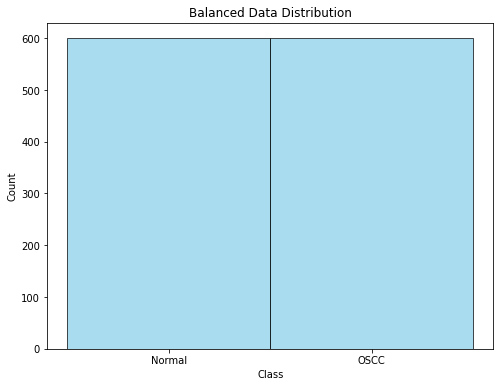

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define constants
data_path = "/home/l2-48/Downloads/ARVIND/oral-combined-dataset"  # Updated path
target_size = (224, 224)  # Define the target size for resizing

# Load and preprocess data
images = []
labels = []

# Loop through each class (NORMAL and OSCC)
for class_name in ['NORMAL', 'OSCC']:
    class_path = os.path.join(data_path, class_name)
    # Iterate through each image in the class
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        # Read the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Resize the image to the target size
        img = cv2.resize(img, target_size)
        # Normalize the pixel values to the range [0, 1]
        img = img.astype(np.float32) / 255.0
        # Append the preprocessed image to the images list
        images.append(img)
        # Append the label (0 for NORMAL, 1 for OSCC) to the labels list
        labels.append(0 if class_name == 'NORMAL' else 1)

# Convert images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Ensure dataset is balanced by selecting 600 images from each class
normal_images = images[labels == 0][:600]  # Select 600 images from NORMAL class
oscc_images = images[labels == 1][:600]    # Select 600 images from OSCC class
normal_labels = labels[labels == 0][:600]
oscc_labels = labels[labels == 1][:600]

# Concatenate the normal and OSCC images and labels to create a balanced dataset
balanced_images = np.concatenate([normal_images, oscc_images])
balanced_labels = np.concatenate([normal_labels, oscc_labels])

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

# Print the balanced data
print("Balanced Images:", balanced_images.shape)
print("Balanced Labels:", balanced_labels.shape)

# Print the data separately for each class
print("Normal Images:", normal_images.shape)
print("OSCC Images:", oscc_images.shape)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Plot histogram for the balanced class distribution
plt.figure(figsize=(8, 6))
plt.hist(balanced_labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['Normal', 'OSCC'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Balanced Data Distribution')
plt.show()


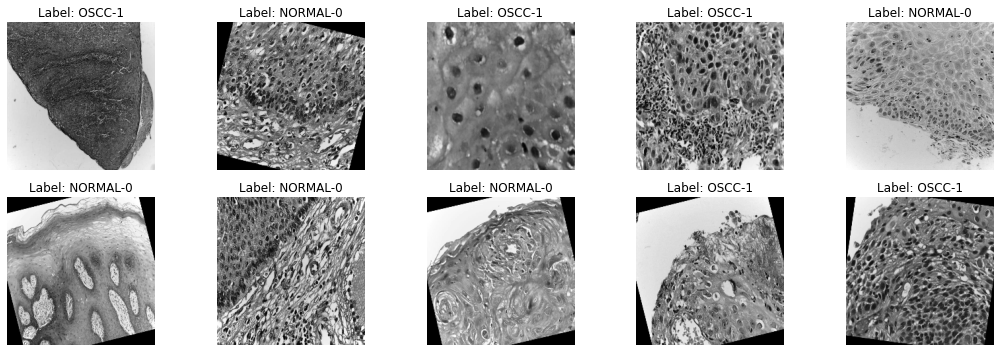

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the number of images to display
num_images_to_display = 10

# Select random indices for the images
indices = random.sample(range(len(balanced_images)), num_images_to_display)

# Create a figure to display the images
plt.figure(figsize=(15, 5))

# Loop over the selected indices and display the images
for i, idx in enumerate(indices):
    # Get the image and its corresponding label
    image = balanced_images[idx]
    label = balanced_labels[idx]

    # Define the label text for display as "NORMAL-0" or "OSCC-1"
    label_text = 'NORMAL-0' if label == 0 else 'OSCC-1'

    # Add a subplot for the current image
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label_text}')
    plt.axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()


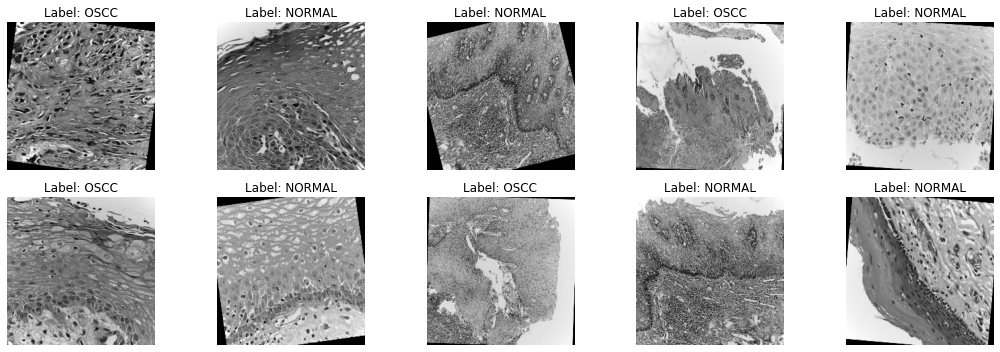

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the number of images to display
num_images_to_display = 10

# Select random indices for the images
indices = random.sample(range(len(balanced_images)), num_images_to_display)

# Create a figure to display the images
plt.figure(figsize=(15, 5))

# Loop over the selected indices and display the images
for i, idx in enumerate(indices):
    # Get the image and its corresponding label
    image = balanced_images[idx]
    label = balanced_labels[idx]

    # Define the label text for display as "NORMAL" or "OSCC"
    label_text = 'NORMAL' if label == 0 else 'OSCC'

    # Add a subplot for the current image
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label_text}')
    plt.axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()


# VGG 16

# Attention mechanism

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 7, 7, 512) │ 14,714,688 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_6 (Flatten) │ (None, 25088)     │          0 │ vgg16[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 512)       │ 12,845,568 │ flatten_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_probs     │ (None, 512)       │    262,656 │ dense_6[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 512)       │          0 │ dense_6[0][0],    │
│                     │                   │            │ attention_probs[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │        513 │ multiply[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 27,823,425 (106.14 MB)

 Trainable params: 27,823,425 (106.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.5023 - loss: 0.6936 - val_accuracy: 0.4500 - val_loss: 0.6934
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.4901 - loss: 0.7237 - val_accuracy: 0.5500 - val_loss: 0.6924
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.4012 - loss: 0.6943 - val_accuracy: 0.4500 - val_loss: 0.6933
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.5144 - loss: 0.6931 - val_accuracy: 0.4500 - val_loss: 0.6933
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.5422 - loss: 0.6978 - val_accuracy: 0.4500 - val_loss: 0.6933
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.


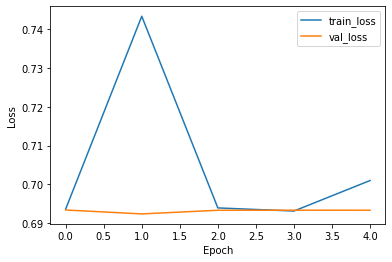

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step - accuracy: 0.5500 - loss: 0.6924
Test Accuracy: 55.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step
Confusion Matrix:
[[ 0  9]
 [ 0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.55      1.00      0.71        11

    accuracy                           0.55        20
   macro avg       0.28      0.50      0.35        20
weighted avg       0.30      0.55      0.39        20

AUC Score: 0.50

Precision: 0.55
Recall: 1.0
F1 Score: 0.7096774193548387
Cohen's Kappa Coefficient: 0.00
Matthews Correlation Coefficient (MCC): 0.00
Balanced Accuracy: 0.50
Model predictions saved to: model_predictions.csv
Time taken: 79.60 seconds


In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Dense, Flatten, Attention, Multiply
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import csv

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG16 model without top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add attention mechanism on top of VGG16
input_layer = Input(shape=(224, 224, 3))
vgg_output = vgg_base(input_layer)
flatten = Flatten()(vgg_output)
dense1 = Dense(512, activation='relu')(flatten)
attention_probs = Dense(np.prod(dense1.shape[1:]), activation='softmax', name='attention_probs')(dense1)
attention_mul = Multiply()([dense1, attention_probs])
output_layer = Dense(1, activation='sigmoid')(attention_mul)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# Save the model predictions to a CSV file
csv_file = "model_predictions.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['True_Label', 'Predicted_Label'])
    writer.writerows(zip(y_test, test_predictions))

print("Model predictions saved to:", csv_file)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 7, 7, 512) │ 14,714,688 │ input_layer_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_7 (Flatten) │ (None, 25088)     │          0 │ vgg16[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 512)       │ 12,845,568 │ flatten_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_probs     │ (None, 512)       │    262,656 │ dense_8[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_1          │ (None, 512)       │          0 │ dense_8[0][0],    │
│ (Multiply)          │                   │            │ attention_probs[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 1)         │        513 │ multiply_1[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 27,823,425 (106.14 MB)

 Trainable params: 27,823,425 (106.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.5589 - loss: 0.6981 - val_accuracy: 0.5500 - val_loss: 1.9538
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.5770 - loss: 1.2182 - val_accuracy: 0.4500 - val_loss: 0.6944
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.4967 - loss: 0.6935 - val_accuracy: 0.4500 - val_loss: 0.6936
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.5071 - loss: 0.6932 - val_accuracy: 0.5500 - val_loss: 0.6917
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.5095 - loss: 0.8851 - val_accuracy: 0.4500 - val_loss: 0.6935
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.4873 - loss: 0.6931 - val_accuracy: 0.4500 - val_loss: 0.6947
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.5113 - loss: 0.6934 - val_accuracy: 0.4500 - val_loss: 0.6941
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 4.


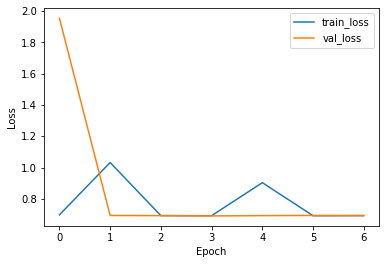

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step - accuracy: 0.5500 - loss: 0.6917
Test Accuracy: 55.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Confusion Matrix:
[[ 0  9]
 [ 0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.55      1.00      0.71        11

    accuracy                           0.55        20
   macro avg       0.28      0.50      0.35        20
weighted avg       0.30      0.55      0.39        20

AUC Score: 0.50

Precision: 0.55
Recall: 1.0
F1 Score: 0.7096774193548387
Cohen's Kappa Coefficient: 0.00
Matthews Correlation Coefficient (MCC): 0.00
Balanced Accuracy: 0.50
Model predictions saved to: model_predictions.csv
Time taken: 113.69 seconds


In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Dense, Flatten, Attention, Multiply
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import csv

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG16 model without top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add attention mechanism on top of VGG16
input_layer = Input(shape=(224, 224, 3))
vgg_output = vgg_base(input_layer)
flatten = Flatten()(vgg_output)
dense1 = Dense(512, activation='relu')(flatten)
attention_probs = Dense(np.prod(dense1.shape[1:]), activation='softmax', name='attention_probs')(dense1)
attention_mul = Multiply()([dense1, attention_probs])
output_layer = Dense(1, activation='sigmoid')(attention_mul)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# Save the model predictions to a CSV file
csv_file = "model_predictions.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['True_Label', 'Predicted_Label'])
    writer.writerows(zip(y_test, test_predictions))

print("Model predictions saved to:", csv_file)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


2024-11-16 16:18:22.332175: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-16 16:18:22.336637: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-16 16:18:22.378561: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-16 16:18:22.418437: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731754102.453085    3972 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731754102.46

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 7, 7, 512) │ 14,714,688 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 25088)     │          0 │ vgg16[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 512)       │ 12,845,568 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_probs     │ (None, 512)       │    262,656 │ dense[0][0]       │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 512)       │          0 │ dense[0][0],      │
│                     │                   │            │ attention_probs[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │        513 │ multiply[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 27,823,425 (106.14 MB)

 Trainable params: 27,823,425 (106.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 143s 5s/step - accuracy: 0.5035 - loss: 1.0887 - val_accuracy: 0.4917 - val_loss: 0.6932
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 149s 5s/step - accuracy: 0.4752 - loss: 0.6933 - val_accuracy: 0.4917 - val_loss: 0.6932
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 150s 5s/step - accuracy: 0.5259 - loss: 0.6930 - val_accuracy: 0.4917 - val_loss: 0.6932
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 148s 5s/step - accuracy: 0.5177 - loss: 0.6930 - val_accuracy: 0.4917 - val_loss: 0.6932
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.


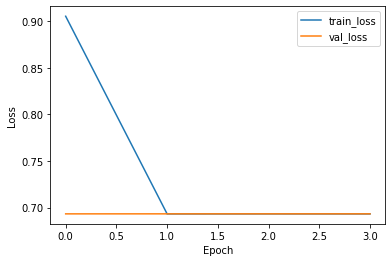

8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4423 - loss: 0.6935
Test Accuracy: 49.17%
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step
Confusion Matrix:
[[  0 122]
 [  0 118]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.49      1.00      0.66       118

    accuracy                           0.49       240
   macro avg       0.25      0.50      0.33       240
weighted avg       0.24      0.49      0.32       240

AUC Score: 0.50

Precision: 0.49166666666666664
Recall: 1.0
F1 Score: 0.659217877094972
Cohen's Kappa Coefficient: 0.00
Matthews Correlation Coefficient (MCC): 0.00
Balanced Accuracy: 0.50
Model predictions saved to: model_predictions.csv
Time taken: 608.76 seconds


In [ ]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Dense, Flatten, Attention, Multiply
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import csv

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained VGG16 model without top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add attention mechanism on top of VGG16
input_layer = Input(shape=(224, 224, 3))
vgg_output = vgg_base(input_layer)
flatten = Flatten()(vgg_output)
dense1 = Dense(512, activation='relu')(flatten)
attention_probs = Dense(np.prod(dense1.shape[1:]), activation='softmax', name='attention_probs')(dense1)
attention_mul = Multiply()([dense1, attention_probs])
output_layer = Dense(1, activation='sigmoid')(attention_mul)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# Save the model predictions to a CSV file
csv_file = "model_predictions.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['True_Label', 'Predicted_Label'])
    writer.writerows(zip(y_test, test_predictions))

print("Model predictions saved to:", csv_file)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# Capsule Network

2024-11-16 15:49:42.876198: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-16 15:49:42.880829: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-16 15:49:42.928542: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-16 15:49:42.983194: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731752383.025427   17947 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731752383.03

2024-11-16 15:49:44.088419: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capsule_layer (CapsuleLayer)    │ (None, 160)            │        20,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,946,721 (68.46 MB)

 Trainable params: 17,946,721 (68.46 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.4474 - loss: 0.7066 - val_accuracy: 0.7000 - val_loss: 0.6789
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.4915 - loss: 0.7068 - val_accuracy: 0.7000 - val_loss: 0.6929
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.5162 - loss: 0.6914 - val_accuracy: 0.3000 - val_loss: 0.7450
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.5648 - loss: 0.6865 - val_accuracy: 0.3000 - val_loss: 0.7783
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.


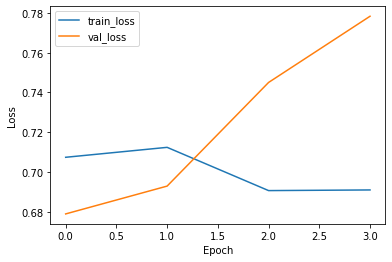

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step - accuracy: 0.7000 - loss: 0.6789
Test Accuracy: 70.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step
Confusion Matrix:
[[ 0  6]
 [ 0 14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.70      1.00      0.82        14

    accuracy                           0.70        20
   macro avg       0.35      0.50      0.41        20
weighted avg       0.49      0.70      0.58        20

AUC Score: 0.50

Precision: 0.7
Recall: 1.0
F1 Score: 0.8235294117647058
Cohen's Kappa Coefficient: 0.0
Matthews Correlation Coefficient (MCC): 0.0
Balanced Accuracy: 0.5
Model predictions saved to: model_predictions.csv
Time taken: 69.16 seconds


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, Dense, Flatten, Input, Reshape, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import csv

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Placeholder data - replace with your actual training and testing data
X_train = np.random.rand(100, 100, 3)  # Example training data with shape (100, 100, 3)
y_train = np.random.randint(0, 2, size=100)  # Example training labels (binary)
X_test = np.random.rand(20, 100, 3)  # Example testing data with shape (20, 100, 3)
y_test = np.random.randint(0, 2, size=20)  # Example testing labels (binary)

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of VGG16

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained VGG16 model without top layers
vgg_base = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add Capsule Network layer on top of VGG16
input_tensor = Input(shape=(224, 224, 3))
vgg_output = vgg_base(input_tensor)
flatten = Flatten()(vgg_output)
x = Dense(128, activation='relu')(flatten)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=input_tensor, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score, Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# Save the model predictions to a CSV file
csv_file = "model_predictions.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['True_Label', 'Predicted_Label'])
    writer.writerows(zip(y_test, test_predictions))

print("Model predictions saved to:", csv_file)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capsule_layer_1 (CapsuleLayer)  │ (None, 160)            │        20,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,946,721 (68.46 MB)

 Trainable params: 17,946,721 (68.46 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.4435 - loss: 0.7170 - val_accuracy: 0.2500 - val_loss: 0.8344
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.5092 - loss: 0.7082 - val_accuracy: 0.7500 - val_loss: 0.6728
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.4602 - loss: 0.6964 - val_accuracy: 0.2500 - val_loss: 0.7003
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.5321 - loss: 0.6936 - val_accuracy: 0.2500 - val_loss: 0.7223
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.5092 - loss: 0.6940 - val_accuracy: 0.2500 - val_loss: 0.7404
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.


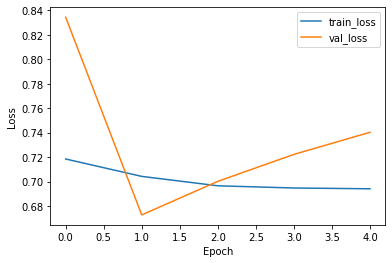

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step - accuracy: 0.7500 - loss: 0.6728
Test Accuracy: 75.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 836ms/step
Confusion Matrix:
[[15  0]
 [ 5  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        15
           1       0.00      0.00      0.00         5

    accuracy                           0.75        20
   macro avg       0.38      0.50      0.43        20
weighted avg       0.56      0.75      0.64        20

AUC Score: 0.50

Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Cohen's Kappa Coefficient: 0.0
Matthews Correlation Coefficient (MCC): 0.0
Balanced Accuracy: 0.5
Model predictions saved to: model_predictions.csv
Time taken: 78.50 seconds


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, Dense, Flatten, Input, Reshape, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import csv

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Placeholder data - replace with your actual training and testing data
X_train = np.random.rand(100, 100, 3)  # Example training data with shape (100, 100, 3)
y_train = np.random.randint(0, 2, size=100)  # Example training labels (binary)
X_test = np.random.rand(20, 100, 3)  # Example testing data with shape (20, 100, 3)
y_test = np.random.randint(0, 2, size=20)  # Example testing labels (binary)

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of VGG16

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained VGG16 model without top layers
vgg_base = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add Capsule Network layer on top of VGG16
input_tensor = Input(shape=(224, 224, 3))
vgg_output = vgg_base(input_tensor)
flatten = Flatten()(vgg_output)
x = Dense(128, activation='relu')(flatten)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=input_tensor, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score, Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# Save the model predictions to a CSV file
csv_file = "model_predictions.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['True_Label', 'Predicted_Label'])
    writer.writerows(zip(y_test, test_predictions))

print("Model predictions saved to:", csv_file)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capsule_layer_2 (CapsuleLayer)  │ (None, 160)            │        20,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,946,721 (68.46 MB)

 Trainable params: 17,946,721 (68.46 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.5070 - loss: 0.6929 - val_accuracy: 0.5500 - val_loss: 0.7033
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.4814 - loss: 0.7308 - val_accuracy: 0.4500 - val_loss: 0.6938
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.5186 - loss: 0.6950 - val_accuracy: 0.4500 - val_loss: 0.6992
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.5300 - loss: 0.6910 - val_accuracy: 0.5500 - val_loss: 0.6931
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.4908 - loss: 0.6936 - val_accuracy: 0.5500 - val_loss: 0.6891
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.4741 - loss: 0.6980 - val_accuracy: 0.5500 - val_loss: 0.6899
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.4237 - loss: 0.7004 - val_accuracy: 0.5500 - val_loss: 0.6927
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.4752 - loss: 0.6933 - val_accuracy: 0.5500 - val_loss: 0.6912


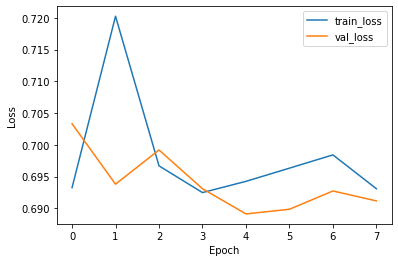

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step - accuracy: 0.5500 - loss: 0.6891
Test Accuracy: 55.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 858ms/step
Confusion Matrix:
[[ 0  9]
 [ 0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.55      1.00      0.71        11

    accuracy                           0.55        20
   macro avg       0.28      0.50      0.35        20
weighted avg       0.30      0.55      0.39        20

AUC Score: 0.50

Precision: 0.55
Recall: 1.0
F1 Score: 0.7096774193548387
Cohen's Kappa Coefficient: 0.0
Matthews Correlation Coefficient (MCC): 0.0
Balanced Accuracy: 0.5
Model predictions saved to: model_predictions.csv
Time taken: 127.91 seconds


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, Dense, Flatten, Input, Reshape, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import csv

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Placeholder data - replace with your actual training and testing data
X_train = np.random.rand(100, 100, 3)  # Example training data with shape (100, 100, 3)
y_train = np.random.randint(0, 2, size=100)  # Example training labels (binary)
X_test = np.random.rand(20, 100, 3)  # Example testing data with shape (20, 100, 3)
y_test = np.random.randint(0, 2, size=20)  # Example testing labels (binary)

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of VGG16

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained VGG16 model without top layers
vgg_base = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add Capsule Network layer on top of VGG16
input_tensor = Input(shape=(224, 224, 3))
vgg_output = vgg_base(input_tensor)
flatten = Flatten()(vgg_output)
x = Dense(128, activation='relu')(flatten)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=input_tensor, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score, Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# Save the model predictions to a CSV file
csv_file = "model_predictions.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['True_Label', 'Predicted_Label'])
    writer.writerows(zip(y_test, test_predictions))

print("Model predictions saved to:", csv_file)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")
